## Section 1: Environment Configuration

Let's import the necessary tools to program quantum circuits with **Qiskit** (IBM's open-source framework).

In [1]:
# Quantum computing framework
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector

# Visualization
import numpy as np
import matplotlib.pyplot as plt

# Custom plotting utilities
import sys
sys.path.append('..')
from utils.plotting import configure_beautiful_plots, COLORS

# Configure beautiful plots
configure_beautiful_plots()

print("✅ All imports successful!")
print("✅ Ready to discover qubits")

✅ All imports successful!
✅ Ready to discover qubits


## Section 2: Creating Our First Quantum Circuit

A **quantum circuit** is like a program:
- It has **qubits** (the variables)
- It has **gates** (the operations)
- It ends with a **measurement** (reading the result)

Let's create the simplest possible circuit: **1 qubit, 0 gates**.

Our first circuit:


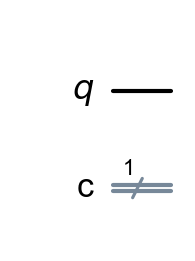


📝 Explanation:
   • Single horizontal line = the qubit (indexed q[0])
   • Double horizontal line = the classical bit (indexed c[0])
   • The qubit always starts in state |0⟩
   • The number '1' indicates there is 1 classical bit
   • For now, there are no gates


In [2]:
# Create a circuit with 1 quantum qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
#                   ↑  ↑
#                   │  └─ 1 classical bit (to store the result)
#                   └──── 1 quantum qubit

# Display the circuit
print("Our first circuit:")
display(qc.draw('mpl'))

print("\n📝 Explanation:")
print("   • Single horizontal line = the qubit (indexed q[0])")
print("   • Double horizontal line = the classical bit (indexed c[0])")
print("   • The qubit always starts in state |0⟩")
print("   • The number '1' indicates there is 1 classical bit")
print("   • For now, there are no gates")

## Section 3: Visualizing the Initial State

When we create a qubit, it's automatically in state **|0⟩**.

Let's visualize this state on the **Bloch Sphere** (a geometric representation of qubits).

Initial state: |0⟩


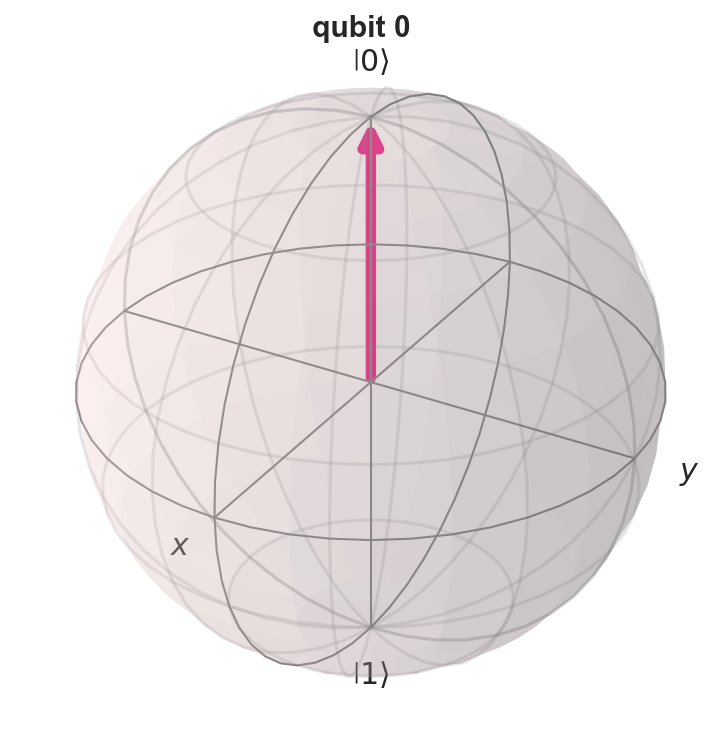

🔵 State |0⟩ is at the NORTH pole of the sphere
   This is the default state of every qubit


In [3]:
# Get the quantum state of the circuit (without gates)
qc = QuantumCircuit(1)
statevector = Statevector(qc)

# Visualize on the Bloch sphere
print("Initial state: |0⟩")
display(plot_bloch_multivector(statevector))

print("🔵 State |0⟩ is at the NORTH pole of the sphere")
print("   This is the default state of every qubit")

### 🌐 The Bloch Sphere: A Map of Quantum States

Imagine a sphere where:
- **North Pole** = |0⟩ (state "0")
- **South Pole** = |1⟩ (state "1")
- **Equator** = superpositions (we'll see that in the next notebook!)

Each point on the sphere = a possible quantum state.

## Section 4: The X Gate - The Quantum "NOT"

The **X** gate (also called "bit flip") transforms:
- |0⟩ → |1⟩
- |1⟩ → |0⟩

It's the quantum equivalent of the classical **NOT** gate.

### 🔄 Classical Analogy

```python
# Classical NOT in Python
bit = 0
bit = not bit  # becomes 1
```

Let's do the same thing with a qubit!

Circuit with X gate:


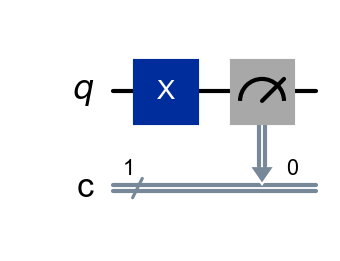


📊 Results (1000 measurements):
   State |0⟩: 0 times
   State |1⟩: 1000 times


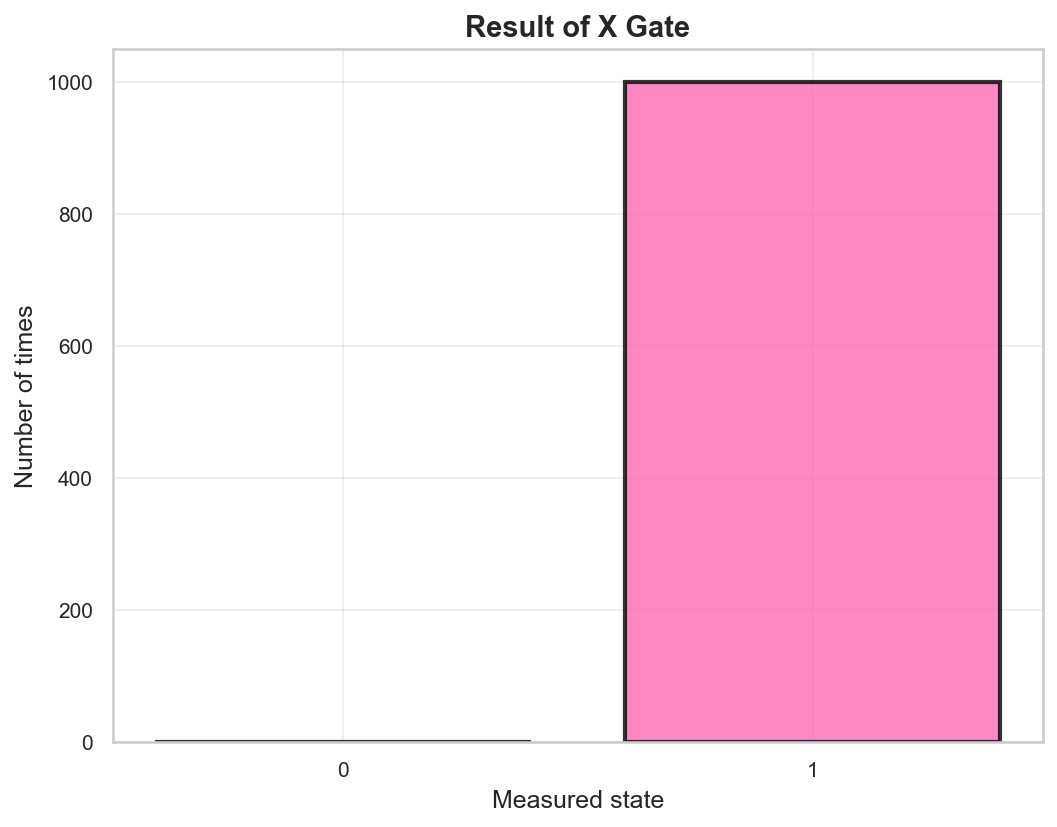


✅ Observation: We ALWAYS get |1⟩!
   The X gate successfully transformed |0⟩ into |1⟩


In [4]:
# Create a circuit with the X gate
qc = QuantumCircuit(1, 1)
qc.x(0)  # Apply X to qubit 0: |0⟩ → |1⟩
qc.measure(0, 0)  # Measure qubit 0, store in classical bit 0

# Visualize the circuit
print("Circuit with X gate:")
display(qc.draw('mpl'))

# Execute the circuit
simulator = AerSimulator()
job = simulator.run(qc, shots=1000)
counts = job.result().get_counts()

# Display the results
print(f"\n📊 Results (1000 measurements):")
print(f"   State |0⟩: {counts.get('0', 0)} times")
print(f"   State |1⟩: {counts.get('1', 0)} times")

# Visualization
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
states = ['0', '1']
values = [counts.get('0', 0), counts.get('1', 0)]
ax.bar(states, values, color=COLORS['primary'], 
       edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('Measured state', fontsize=12)
ax.set_ylabel('Number of times', fontsize=12)
ax.set_title('Result of X Gate', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.show()

print("\n✅ Observation: We ALWAYS get |1⟩!")
print("   The X gate successfully transformed |0⟩ into |1⟩")

## Section 5: The X Gate on the Bloch Sphere

Let's see how the X gate transforms the state on the Bloch sphere.

BEFORE: |0⟩ (North Pole)


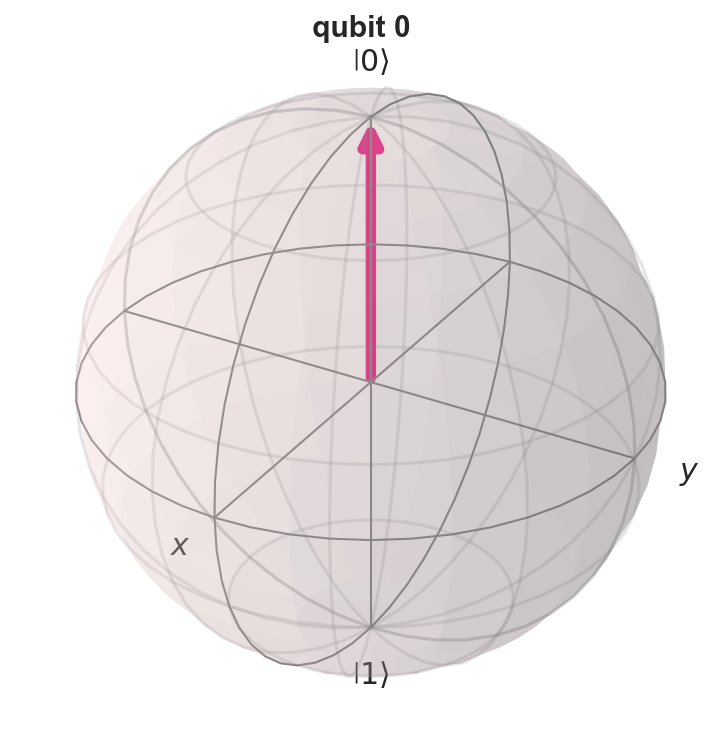


AFTER: |1⟩ (South Pole)


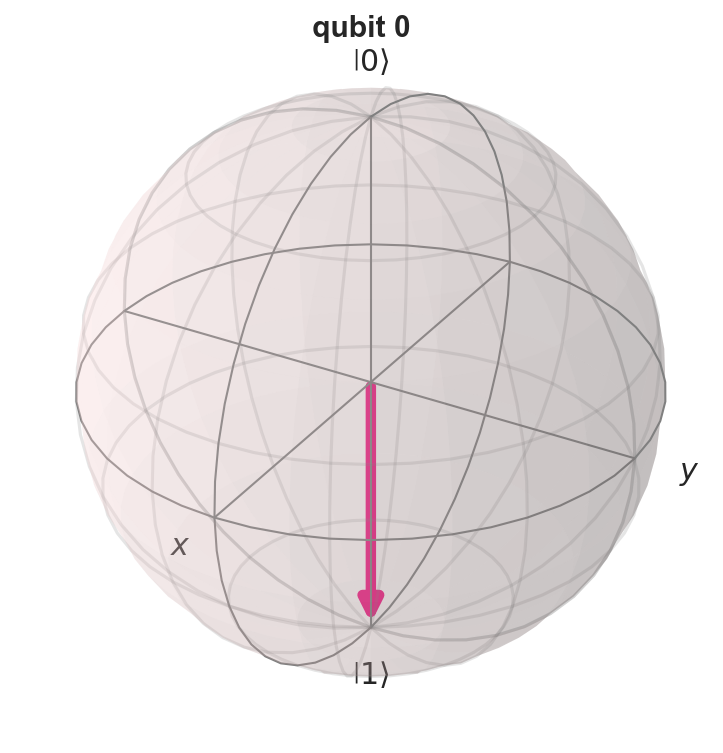


🔄 The X gate performs a 180° rotation around the X axis
   It transforms the North pole (|0⟩) into the South pole (|1⟩)


In [5]:
# State BEFORE X gate
qc_before = QuantumCircuit(1)
sv_before = Statevector(qc_before)

# State AFTER X gate
qc_after = QuantumCircuit(1)
qc_after.x(0)
sv_after = Statevector(qc_after)

# Visualization
print("BEFORE: |0⟩ (North Pole)")
display(plot_bloch_multivector(sv_before))

print("\nAFTER: |1⟩ (South Pole)")
display(plot_bloch_multivector(sv_after))

print("\n🔄 The X gate performs a 180° rotation around the X axis")
print("   It transforms the North pole (|0⟩) into the South pole (|1⟩)")

## Section 6: Understanding a Quantum Circuit

Let's decode the elements of a circuit:

```
     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0
```

**Elements:**
1. **Horizontal lines** (`q_0:`) = quantum qubits
2. **Boxes** (`┤ X ├`) = quantum gates (operations)
3. **Measurement symbol** (`┤M├`) = reading the qubit
4. **Classical line** (`c: 1/`) = classical bits (to store results)
5. **Read left → right**: Time flows from left to right

**Execution order:**
1. Initialize q_0 to |0⟩
2. Apply X gate → |1⟩
3. Measure → Store "1" in classical bit c[0]

## Section 7: The Complete Quantum Workflow

Let's recap the process:

```
┌─────────────┐
│ 1. Create   │  qc = QuantumCircuit(1, 1)
│    Circuit  │
└──────┬──────┘
       │
       ▼
┌─────────────┐
│ 2. Add      │  qc.x(0)
│    Gates    │
└──────┬──────┘
       │
       ▼
┌─────────────┐
│ 3. Measure  │  qc.measure(0, 0)
└──────┬──────┘
       │
       ▼
┌─────────────┐
│ 4. Simulate │  simulator.run(qc, shots=1000)
└──────┬──────┘
       │
       ▼
┌─────────────┐
│ 5. Analyze  │  result.get_counts()
│    Results  │
└─────────────┘
```

**Important note**: We're using a **simulator** (running on a classical computer), not a real quantum computer. For learning, this is perfect!

## 🎯 Guided Exercise: Predict the Result!

**Question**: If we apply the X gate **twice**, what will be the result?

```python
qc = QuantumCircuit(1, 1)
qc.x(0)  # First time: |0⟩ → |1⟩
qc.x(0)  # Second time: |1⟩ → ???
qc.measure(0, 0)
```

🤔 **Think before coding**:
- [ ] We always get |0⟩
- [ ] We always get |1⟩
- [ ] We get 50% |0⟩ and 50% |1⟩

<details>
<summary>👉 Click here to see the answer</summary>

**Answer**: We always get |0⟩

**Explanation**: 
- First X: |0⟩ → |1⟩
- Second X: |1⟩ → |0⟩
- The X gate is **reversible**: X·X = I (identity)

</details>

In [6]:
# 🟢 Level 1: Test it yourself!
# Uncomment and run this code:

# qc = QuantumCircuit(1, 1)
# qc.x(0)  # First X
# qc.x(0)  # Second X
# qc.measure(0, 0)

# simulator = AerSimulator()
# counts = simulator.run(qc, shots=1000).result().get_counts()
# print(counts)

## 🎯 CHECKPOINT: Can you...

Check your knowledge before moving to the next notebook:

- [ ] Create a circuit with `QuantumCircuit(n_qubits, n_bits)`?
- [ ] Add an X gate with `qc.x(0)`?
- [ ] Measure a qubit with `qc.measure(0, 0)`?
- [ ] Execute with `simulator.run(qc, shots=1000)`?
- [ ] Interpret a result histogram?

If you answered "yes" to everything, congratulations! 🎉

## 🎯 Quick Quiz

**1. A qubit always starts in which state?**
- [x] |0⟩ (north pole)
- [ ] |1⟩ (south pole)
- [ ] Superposition (equator)

**2. What does the X gate do?**
- [ ] Creates a superposition
- [x] Transforms |0⟩ into |1⟩ (and vice versa)
- [ ] Measures the qubit

**3. How many times must you apply X to return to the initial state?**
- [ ] 1 time
- [x] 2 times
- [ ] 4 times

**4. On the Bloch sphere, where is |1⟩ located?**
- [ ] North Pole
- [x] South Pole
- [ ] Equator

## 🎓 Notebook 0 Summary

**What you learned:**
✅ Create a quantum circuit  
✅ Add a gate (X)  
✅ Measure a qubit  
✅ Visualize on the Bloch sphere  
✅ Interpret results  

**Progress**: ⬛⬜⬜⬜⬜⬜⬜ (1/7 completed)

---

## 🚀 Next Step: Notebook 1 - Superposition

So far, we've seen **definite** states: either |0⟩ or |1⟩.

In the next notebook, we discover **quantum superposition**:  
A qubit that is **both 0 AND 1** until measured! 🤯

**Teaser**: We'll create a truly random number generator with the **Hadamard** (H) gate.

See you soon! 🎉